In [1]:
# 어떤 때 확률적 경사 하강법을 사용하는지?
# 기존 데이터로 만들어 놓은 모델에서 조금씩 새로운 데이터를 추가해서 모델을 학습 시키려고 할 때
# 기존 데이터+추가 데이터 학습할 때 데이터가 점점 많아져서 서버를 늘려야 함
# 이전 데이터를 버리면 중요한 데이터가 없어질 수 있음
# 데이터 양을 늘리지 않고 기존 모델+새로운 데이터에 대해서만 학습하기 위해서 사용하는 룬련방식
# 점진적 학습, 대표적인 알고리즘이 확률적 경사하강법
# 훈련세트의 가장 빠른길은 가장 가파른길을 조금씩 내려오는 과정이 훈련
# 전체 샘플을 사용하지 않고 딱 하나의 샘플을 랜덤하게 골라 가장 가파른 길 찾기->확률적
# 훈련세트에서 랜덤하게 하나의 샘플 선택하여 가파른 경사 내려가기하면서 전체 샘플 모두 사용할 때까지 계산
# 훈련세트를 모두 한번 사용하는 과정을 에포크
# 만족할만한 위치에 내려올 때까지 에포크 과정을 수십, 수백번 수행
# 조금씩 내려가야 하는데 샘플 1개가 아닌 여러개 샘플 사용하는 걸 미니배치 경사하강법이라고 함
# 샘플 전체를 사용하는 방식은 배치 경사 하강법, 안정적 방법이나, 컴퓨터 자원을 많이 사용하고 데이터가 많으면 한번에 전체 데이터 읽을 수 없음
# 신경망 모델이 바로 확률적 경사하강법을 꼭 사용함
# 이 산이 손실함수임

## SGDClassifier

## 첫번째 예제 

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [6]:
# 특성 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import SGDClassifier

In [11]:
# 2개 매개 변수 지정
# loss는 솔실 함수 종류 지정
# max_iter 수행할 에포크 횟수 (전체 훈련세트 반복)

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
# 훈련

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [13]:
# 평가
sc.score(train_scaled, train_target)

0.773109243697479

In [14]:
sc.score(test_scaled, test_target)

0.775

In [15]:
# 훈련/테스트 점수 낮음, 반복 횟수 늘려보기
# ConvergenceWarning은 매개변수 값 늘려주기, 오류 아닌 경고 
# 훈련한 모델 추가로 훈련

In [16]:
sc.partial_fit(train_scaled, train_target)
# 모델 이어서 훈련할 때 사용, 호출할 때마다 1에포크씩 이어서 훈련

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [17]:
sc.score(train_scaled, train_target)

0.8151260504201681

In [18]:
sc.score(test_scaled, test_target)

0.825

In [19]:
# 무한 반복할 수 없음, 기준이 있을 것
# 에포크 횟수에 따라 과소적합, 과대적합 될 수 있음
# 과대적합 기작 전에 훈련 멈추는 것을 조기 종료라고 함

## 두번째 예제

In [20]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)
# train_target에 있는 7개 생선 목록 만들기
# 에포크마다 훈련 세트, 테스트 세트 점수 기록하기 위해 2개 리스트 준비하기

In [21]:
# 300번의 에포크 동안 훈련 반복하여 진행
# 반복마다 훈련 세트와 테스트 세트 점수 계산하여 리스트 추가
# _ 는 특별한 변수 : 나중에 사용하지 않고 그냥 버리는 값 넣어두는 용도, 299까지 반복 횟수 임시 저장 용도로 사용

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

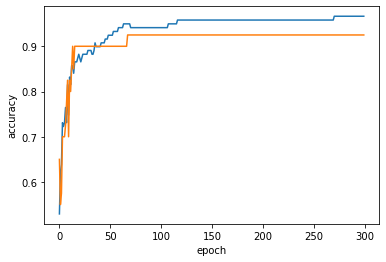

In [22]:
import matplotlib.pyplot as plt
plt.plot(train_score)#blue
plt.plot(test_score)#orange
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 백번째 에포크가 적절한 반복 횟수

In [23]:
# 100에 맞추고 모델 다시 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [24]:
sc.score(train_scaled, train_target)

0.957983193277311

In [25]:
sc.score(test_scaled, test_target)

0.925

In [26]:
# SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
# tol매개변수에서 향상될 최솟값 지정, None으로 지정시 100만큼 무조건 반복
# 괜찮은 점수가 나옴
# 분류/회귀 모델 모두 사용 가능
# loss 매개변수 기본값은 'hinge'임

In [27]:
# log가 아닌, hinge 손실로 돌려보기, 서포트벡터머신에 주로 사용
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
sc.score(train_scaled, train_target)

0.9495798319327731

In [29]:
sc.score(test_scaled, test_target)

0.925